### Import Required Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

### Load the Dataset

In [12]:
import pandas as pd

# Load the dataset
df = pd.read_csv("Customer_dataset.csv")

# Display the first few rows
print(df.head())

# Display basic information about the dataset
print(df.info())

# Check for basic statistics
print(df.describe())


   Year  Month Customers_State       Sector  Customers  Price   Revenue  \
0  2001      1         Wyoming  all sectors        NaN   4.31  48.12840   
1  2001      1         Wyoming   commercial        NaN   5.13  12.67978   
2  2001      1         Wyoming   industrial        NaN   3.26  19.60858   
3  2001      1         Wyoming        other        NaN   4.75   0.76868   
4  2001      1         Wyoming  residential        NaN   6.01  15.07136   

        Sales  
0  1116.17208  
1   247.08691  
2   602.30484  
3    16.17442  
4   250.60591  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85870 entries, 0 to 85869
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             85870 non-null  int64  
 1   Month            85870 non-null  int64  
 2   Customers_State  85870 non-null  object 
 3   Sector           85870 non-null  object 
 4   Customers        59830 non-null  float64
 5   Price            8

### Handle Missing Values

In [13]:
# Check for missing values
print("Missing Values:\n", df.isnull().sum())

# Drop rows with missing values (if necessary)
df.dropna(inplace=True)

# Confirm missing values are removed
print("Missing Values After Cleaning:\n", df.isnull().sum())


Missing Values:
 Year                   0
Month                  0
Customers_State        0
Sector                 0
Customers          26040
Price                  0
Revenue                0
Sales                  0
dtype: int64
Missing Values After Cleaning:
 Year               0
Month              0
Customers_State    0
Sector             0
Customers          0
Price              0
Revenue            0
Sales              0
dtype: int64


### Remove Duplicates

In [14]:
# Check for duplicate rows
print("Duplicate Rows:", df.duplicated().sum())

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Confirm removal
print("Duplicate Rows After Cleaning:", df.duplicated().sum())


Duplicate Rows: 0
Duplicate Rows After Cleaning: 0


### Detect and Remove Outliers

In [15]:
import numpy as np

# Function to detect and remove outliers using IQR
def remove_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1

    # Define lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filtering the dataset
    return data[~((data < lower_bound) | (data > upper_bound)).any(axis=1)]

# Remove outliers
df_cleaned = remove_outliers_iqr(df.select_dtypes(include=[np.number]))

# Update original dataframe
df = df.loc[df_cleaned.index]

# Confirm shape after outlier removal
print("Dataset Shape After Removing Outliers:", df.shape)


Dataset Shape After Removing Outliers: (43553, 8)


### Convert Data Types

In [16]:
# Check data types
print("Data Types Before Conversion:\n", df.dtypes)


Data Types Before Conversion:
 Year                 int64
Month                int64
Customers_State     object
Sector              object
Customers          float64
Price              float64
Revenue            float64
Sales              float64
dtype: object


In [18]:
# Convert 'Year' and 'Month' to string (categorical if needed)
df['Year'] = df['Year'].astype(str)
df['Month'] = df['Month'].astype(str)

# Convert categorical columns to category type
df['Customers_State'] = df['Customers_State'].astype('category')
df['Sector'] = df['Sector'].astype('category')

# Ensure numerical columns are correctly formatted
numerical_cols = ['Customers', 'Price', 'Revenue', 'Sales']
df[numerical_cols] = df[numerical_cols].apply(pd.to_numeric)

# Display updated data types
print("Data Types After Conversion:\n", df.dtypes)


Data Types After Conversion:
 Year                 object
Month                object
Customers_State    category
Sector             category
Customers           float64
Price               float64
Revenue             float64
Sales               float64
dtype: object


### Perform Exploratory Data Analysis (EDA)

In [19]:
# Summary of the dataset
print("Dataset Overview:")
print(df.info())

# Statistical summary
print("\nStatistical Summary:\n", df.describe())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 43553 entries, 26040 to 85869
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Year             43553 non-null  object  
 1   Month            43553 non-null  object  
 2   Customers_State  43553 non-null  category
 3   Sector           43553 non-null  category
 4   Customers        43553 non-null  float64 
 5   Price            43553 non-null  float64 
 6   Revenue          43553 non-null  float64 
 7   Sales            43553 non-null  float64 
dtypes: category(2), float64(4), object(2)
memory usage: 2.4+ MB
None

Statistical Summary:
           Customers         Price       Revenue         Sales
count  4.355300e+04  43553.000000  43553.000000  43553.000000
mean   7.665769e+05      9.878665    202.006549   2116.191342
std    1.135495e+06      2.983668    225.638064   2316.768415
min    0.000000e+00      1.800000      0.000330      0.0032

### Save clean dataset

In [20]:
# Save the cleaned dataset to a new CSV file
cleaned_file_path = "Customer_dataset_cleaned.csv"
df.to_csv(cleaned_file_path, index=False)

print(f"Cleaned dataset saved successfully as {cleaned_file_path}")

Cleaned dataset saved successfully as Customer_dataset_cleaned.csv


In [21]:
# Check unique values in categorical columns
print("\nUnique Value Counts for Categorical Columns:")
for col in df.select_dtypes(include=['object']).columns:
    print(f"{col}: {df[col].nunique()} unique values")

# Display value counts of categorical variables
print("\nValue Counts of Categorical Features:")
for col in df.select_dtypes(include=['object']).columns:
    print(f"\n{col}:\n{df[col].value_counts()}")


Unique Value Counts for Categorical Columns:
Year: 17 unique values
Month: 12 unique values

Value Counts of Categorical Features:

Year:
2009    2819
2011    2797
2013    2793
2012    2790
2010    2789
2008    2760
2014    2756
2016    2738
2015    2730
2017    2717
2018    2690
2019    2667
2020    2652
2021    2640
2022    2535
2023    2477
2024     203
Name: Year, dtype: int64

Month:
1     3817
4     3649
3     3639
11    3637
2     3636
5     3624
10    3624
12    3611
6     3608
9     3588
7     3560
8     3560
Name: Month, dtype: int64


In [22]:
# Checking correlation between numerical features
print("\nCorrelation Matrix:\n", df.corr())


Correlation Matrix:
            Customers     Price   Revenue     Sales
Customers   1.000000  0.246728  0.703906  0.601769
Price       0.246728  1.000000  0.120676 -0.101909
Revenue     0.703906  0.120676  1.000000  0.943625
Sales       0.601769 -0.101909  0.943625  1.000000


### Define Features and Target

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define target variable
target = "Revenue"  # Change to 'Sales' or another variable if needed

# Define features (excluding the target)
X = df.drop(columns=[target])
y = df[target]

# Identify categorical and numerical columns
categorical_features = ["Customers_State", "Sector", "Year", "Month"]
numerical_features = ["Customers", "Price", "Sales"]

# Preprocessing pipeline
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_features),
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data Splitting Done: Train Shape:", X_train.shape, "Test Shape:", X_test.shape)

Data Splitting Done: Train Shape: (34842, 7) Test Shape: (8711, 7)


### Train the Model

In [25]:
# Build a pipeline with preprocessing and regression model
model = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

# Train the model
model.fit(X_train, y_train)

print("Model Training Completed.")

Model Training Completed.


###  Model Evaluation

In [26]:
# Predict on test data
y_pred = model.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"Model Evaluation Results:\nMAE: {mae}\nMSE: {mse}\nRMSE: {rmse}\nR² Score: {r2}")

Model Evaluation Results:
MAE: 27.955734394042103
MSE: 1706.0718230547109
RMSE: 41.30462229647804
R² Score: 0.9658689001842171


### Distribution of Target Variable (Revenue)

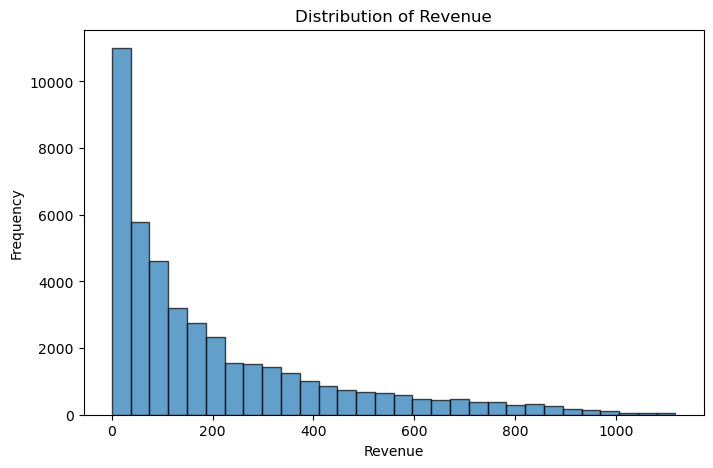

In [27]:
import matplotlib.pyplot as plt

# Histogram of revenue
plt.figure(figsize=(8, 5))
plt.hist(df[target], bins=30, edgecolor="black", alpha=0.7)
plt.xlabel("Revenue")
plt.ylabel("Frequency")
plt.title("Distribution of Revenue")

# Save the figure
plt.savefig("revenue_distribution.png", dpi=300, bbox_inches="tight")
plt.show()

### Actual vs Predicted Values

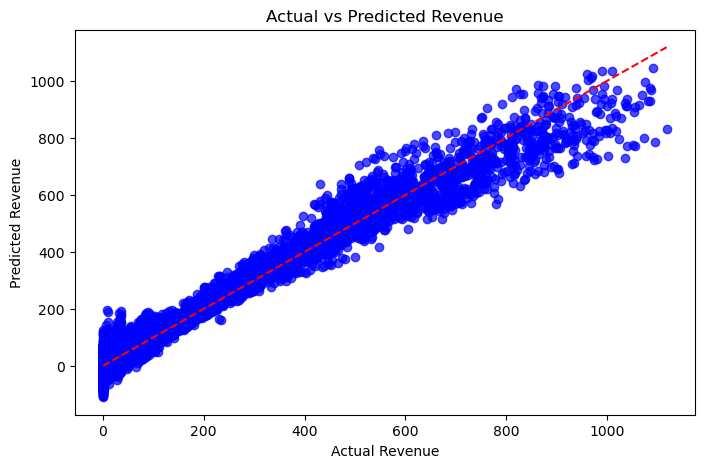

In [28]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.7, color="blue")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="dashed")  # Reference line
plt.xlabel("Actual Revenue")
plt.ylabel("Predicted Revenue")
plt.title("Actual vs Predicted Revenue")

# Save the figure
plt.savefig("actual_vs_predicted.png", dpi=300, bbox_inches="tight")
plt.show()

### Feature Importance (for Linear Models)

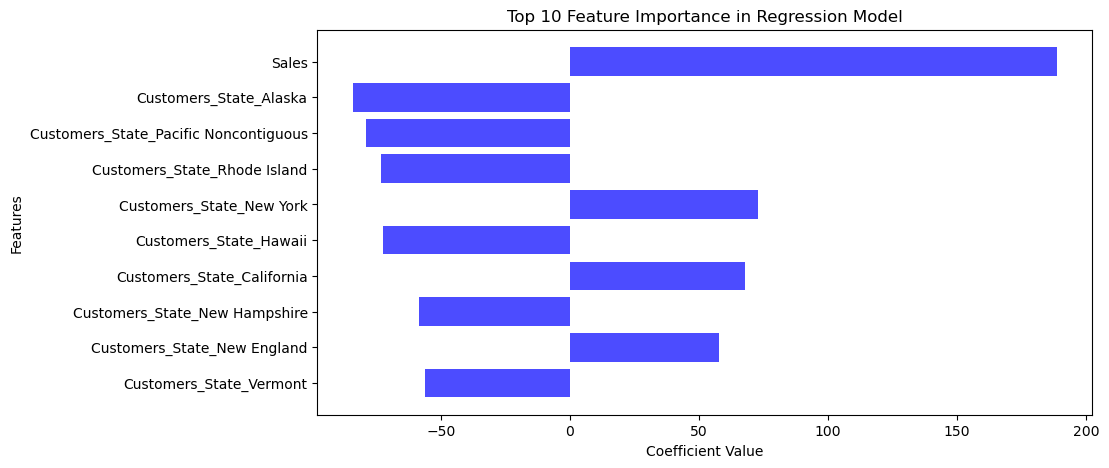

In [29]:
import numpy as np

# Extract feature names after transformation
feature_names = numerical_features + list(model.named_steps["preprocessor"].transformers_[1][1].get_feature_names_out(categorical_features))

# Extract coefficients
coefficients = model.named_steps["regressor"].coef_

# Sort feature importance
sorted_idx = np.argsort(abs(coefficients))[::-1]
sorted_features = [feature_names[i] for i in sorted_idx]
sorted_importance = coefficients[sorted_idx]

# Plot feature importance
plt.figure(figsize=(10, 5))
plt.barh(sorted_features[:10], sorted_importance[:10], color="blue", alpha=0.7)
plt.xlabel("Coefficient Value")
plt.ylabel("Features")
plt.title("Top 10 Feature Importance in Regression Model")
plt.gca().invert_yaxis()

# Save the figure
plt.savefig("feature_importance.png", dpi=300, bbox_inches="tight")
plt.show()

### Revenue Trends Over Time

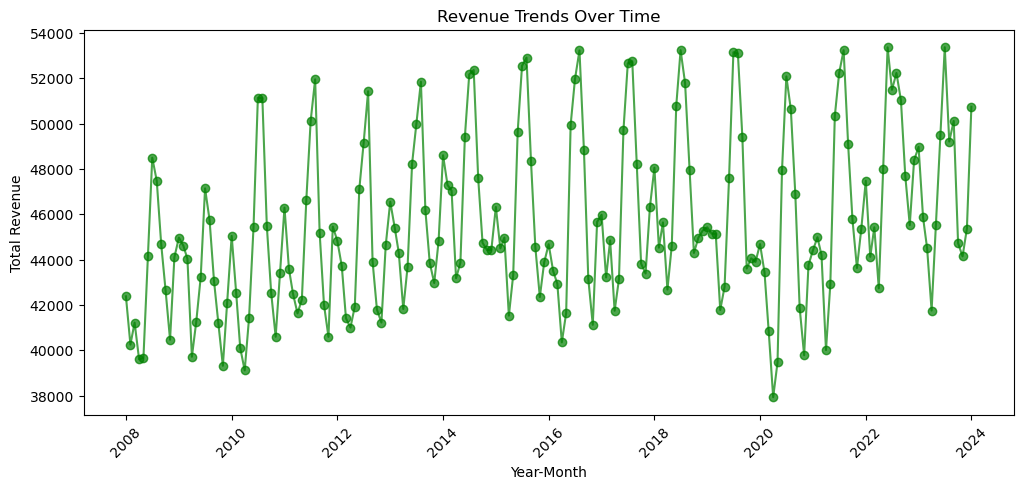

In [30]:
# Convert 'Year' and 'Month' to datetime format for trend analysis
df["Date"] = pd.to_datetime(df["Year"] + "-" + df["Month"], format="%Y-%m")

# Group revenue by time
revenue_trend = df.groupby("Date")["Revenue"].sum()

# Plot revenue trends over time
plt.figure(figsize=(12, 5))
plt.plot(revenue_trend.index, revenue_trend.values, marker="o", linestyle="-", color="green", alpha=0.7)
plt.xlabel("Year-Month")
plt.ylabel("Total Revenue")
plt.title("Revenue Trends Over Time")
plt.xticks(rotation=45)

# Save the figure
plt.savefig("revenue_trend.png", dpi=300, bbox_inches="tight")
plt.show()

### Sales vs Price Relationship

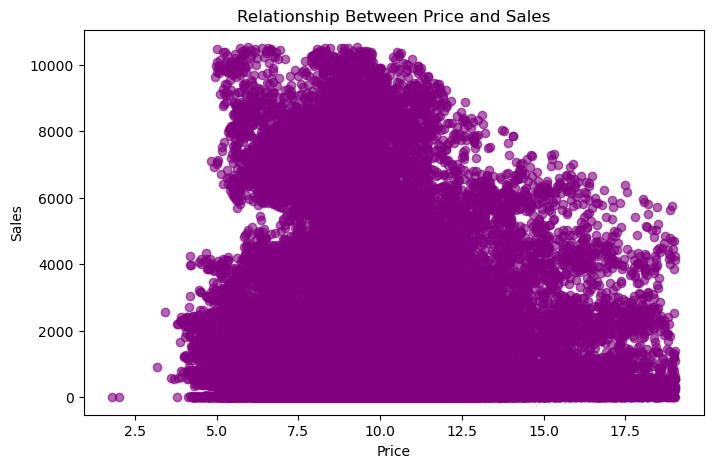

In [31]:
plt.figure(figsize=(8, 5))
plt.scatter(df["Price"], df["Sales"], alpha=0.6, color="purple")
plt.xlabel("Price")
plt.ylabel("Sales")
plt.title("Relationship Between Price and Sales")

# Save the figure
plt.savefig("price_vs_sales.png", dpi=300, bbox_inches="tight")
plt.show()

### Sales by Customer State (Bar Chart)

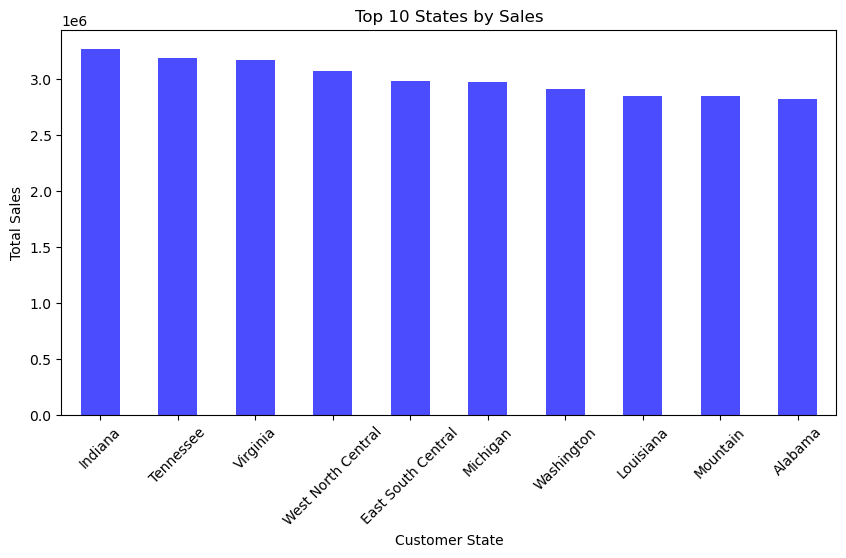

In [33]:
import matplotlib.pyplot as plt

# Group by 'Customers_State' and sum the sales
top_states_sales = df.groupby("Customers_State")["Sales"].sum().nlargest(10)

# Plot bar chart for top 10 states by sales
plt.figure(figsize=(10, 5))
top_states_sales.plot(kind="bar", color="blue", alpha=0.7)
plt.xlabel("Customer State")
plt.ylabel("Total Sales")
plt.title("Top 10 States by Sales")
plt.xticks(rotation=45)

# Save the figure
plt.savefig("top_10_states_sales.png", dpi=300, bbox_inches="tight")
plt.show()